<a href="https://colab.research.google.com/github/Charanpoojary/CUSTOMER-SEGMENTATION-PROJECT-2/blob/main/youtube_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step 1= understand problem statement


#  This case requires to develop a customer segmentation to define marketing strategy, the dataset summarises the usage behavior of about 9000 active credit card holders during the last 6 month the file is at a customer level with 18 behavioral variables

# step 2= import libraries and dataset

In [ ]:
# importing libraries that is needed for the operations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [ ]:
from google.colab import drive  # mounting our drive to google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/marketing_data.csv'
creditcard_df=pd.read_csv(file_path)            # reading the data

In [ ]:
creditcard_df.shape   # returns the shape of the dataset

(8950, 18)

In [ ]:
creditcard_df.head()   #returns the first 5 rows of the data

In [ ]:
creditcard_df.info()   # returns the information of the dataset

In [ ]:
creditcard_df.describe()   # returns the description of numerical columns

In [ ]:
# get the customer id who made max ONEOFF_PURCHASES
maxoneoff_purchase=creditcard_df['ONEOFF_PURCHASES'].max()  
maxoneoff_purchase

40761.25

In [ ]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == maxoneoff_purchase ]['CUST_ID'] #customer id with max oneoff purchase

550    C10574
Name: CUST_ID, dtype: object

In [ ]:
# customer id which has max number of cash_advance
lesscash_advance=creditcard_df['CASH_ADVANCE'].max()
lesscash_advance

47137.21176

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == lesscash_advance ]['CUST_ID']

2159    C12226
Name: CUST_ID, dtype: object

In [ ]:
#visualisation of dataset

In [ ]:
#now let us check for the null values using heatmap

In [ ]:
sns.heatmap(creditcard_df.isnull())    #we can see there are some null values in the datase

In [ ]:
#now let us calculate the total sum of the null values in each columns

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# only two columns has nullvalues

In [ ]:
#lets replace the null values using mean values of the perticular column

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df['MINIMUM_PAYMENTS']

In [ ]:
creditcard_df.isnull().sum() # now lets check again

In [ ]:
#now lets fill credit limit columns

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df['CREDIT_LIMIT']

In [ ]:
creditcard_df.isnull().sum()     # now lets check again

In [ ]:
#now our entire dataset is ready with nonnullvalues

In [ ]:
#we have done operations on nulll values now let us check for duplicate values

In [ ]:
creditcard_df.duplicated().sum()

0

In [ ]:
# our entire dataset is free from duplicate values

In [ ]:
#droping columns
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
creditcard_df.shape

(8950, 17)

In [ ]:
# we know that initially we had 18 columns but after dropping cust_id we have 17 columns

In [ ]:
list(creditcard_df.columns)  # returns the list of the columns that we are having in the dataset

In [ ]:
# distplot ,its a combination of matplotlib.hist function and seaborn KDE plot()
# KDE kernel density estimate
# KDE is used to visualize probability density of a continuos variables 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

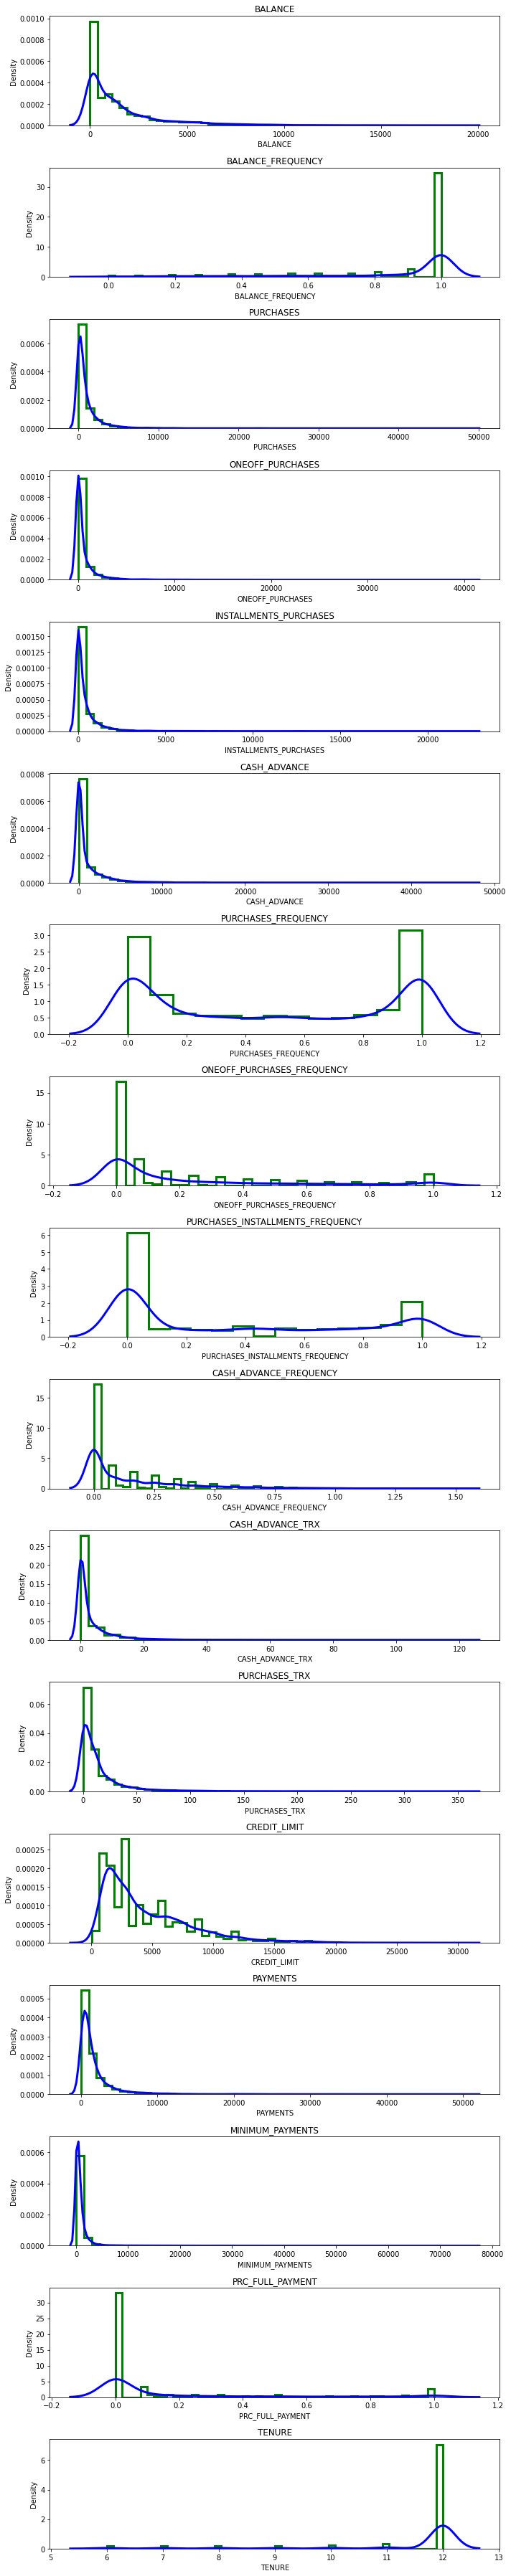

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={"color": "b", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
  plt.title(creditcard_df.columns[i])
plt.tight_layout() 


In [ ]:
# correlation matrix between feature

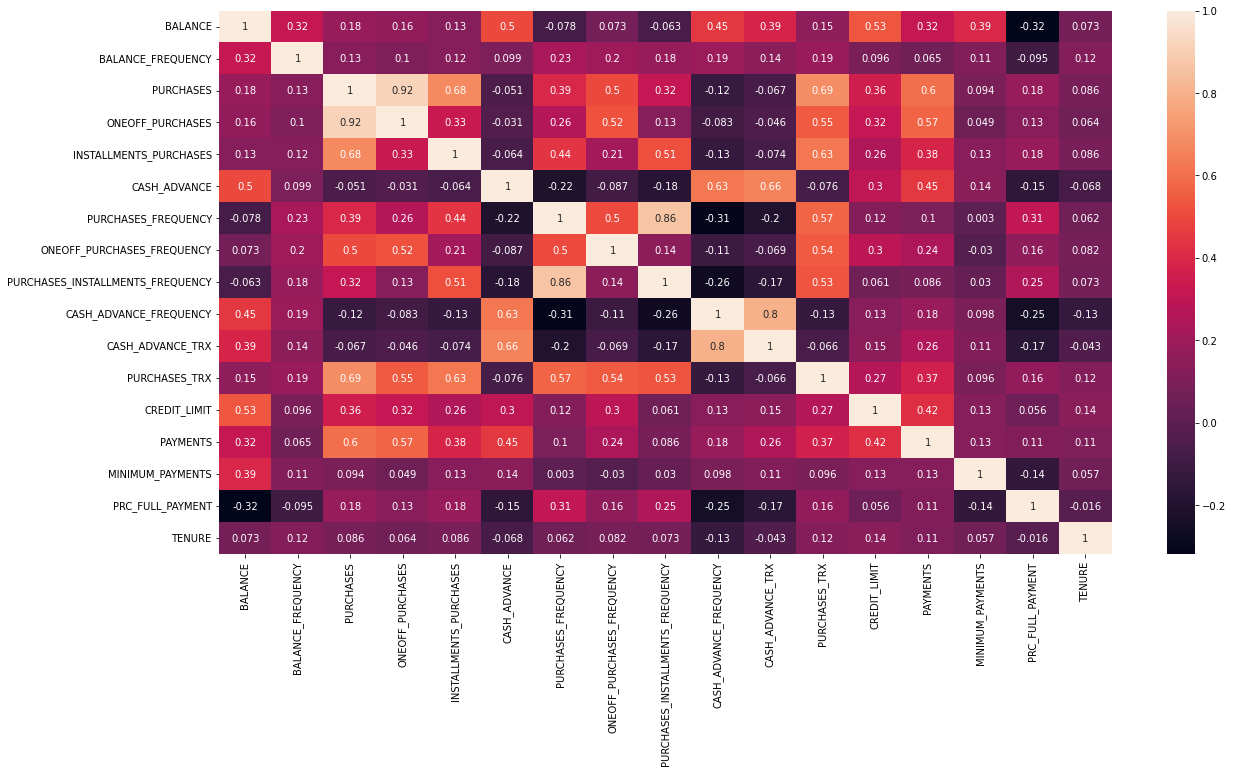

In [ ]:
correlation=creditcard_df.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlation,annot=True)

In [ ]:
# kmeans algorithm

In [ ]:
# elbow method (how many clusters u should have)

In [ ]:
# firstly we need to scale our dataset

In [ ]:
from sklearn.preprocessing import StandardScaler,normalize
scaler=StandardScaler()
my_data=scaler.fit_transform(creditcard_df)

In [ ]:
my_data.shape   # returns the shape of the data

(8950, 17)

In [ ]:
my_data       # now we can see after scaling our data range is between -1 to 1

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

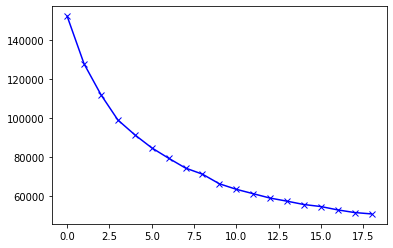

In [ ]:
# elbow method graph ( for selecting the no of clusters )
from sklearn.cluster import KMeans
scores=[]
range_values=range(1,20)
for i in range_values:
  kmean = KMeans(n_clusters=i)
  kmean.fit(my_data)
  scores.append(kmean.inertia_)

plt.plot(scores,'bx-')

In [ ]:
# from the above graph we can see that near 7-8 the graph is becoming linear ,
# so we can tell that number of cluster is equal to either 7 or 8 

In [ ]:
# so in the original dataset we had 17 columns but what if we had 7 columns (what would be our no of cluster value) 

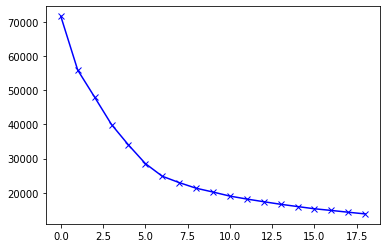

In [ ]:
# elbow method graph ( for selecting the no of clusters )
from sklearn.cluster import KMeans
scores=[]
range_values=range(1,20)
for i in range_values:
  kmean = KMeans(n_clusters=i)
  kmean.fit(my_data[:,:8])                    # so here we have to select 8 columns(fitting 8 columns)
  scores.append(kmean.inertia_)

plt.plot(scores,'bx-')

In [ ]:
# so the answer would be 4 or 5 clusters

In [ ]:
# applying kmeans algorithm

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(7)
kmeans.fit(my_data)
label=kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(7, 17)

In [ ]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])    # creating a dataframe

In [ ]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.145081,0.430858,0.975623,0.924330,0.608669,-0.306508,1.101100,1.880802,0.549180,-0.405640,-0.315439,1.231054,0.721897,0.413901,-0.029766,0.471069,0.307220
1,-0.701621,-2.133669,-0.307326,-0.230965,-0.302231,-0.320146,-0.548455,-0.429475,-0.441594,-0.520536,-0.375711,-0.416671,-0.171953,-0.192124,-0.257337,0.299047,0.202440
2,0.004711,0.403280,-0.341320,-0.221753,-0.399538,-0.106580,-0.806650,-0.330470,-0.753154,0.080971,-0.043876,-0.462733,-0.301392,-0.248125,-0.016584,-0.451821,0.272460
3,-0.371120,0.331757,-0.039644,-0.231906,0.332141,-0.367950,0.980765,-0.346375,1.171085,-0.477539,-0.362779,0.173265,-0.276917,-0.222552,-0.030222,0.303519,0.252632
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
5,1.488505,0.403475,7.413638,6.553369,5.486972,0.028557,1.072872,1.875094,1.028264,-0.309559,-0.107750,4.914457,2.259343,5.133194,0.782295,0.828775,0.330386
6,1.670940,0.397069,-0.198479,-0.149076,-0.195517,1.982558,-0.451250,-0.189443,-0.398500,1.904089,1.916916,-0.236829,1.007923,0.819936,0.585942,-0.395395,0.069763


In [ ]:
# now we have to inverse transform the centroid points

In [ ]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns]) 
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1866.448556,0.979337,3087.638418,2126.635564,961.479801,336.109458,0.932275,0.763537,0.582696,0.053972,1.096184,45.309221,7121.007371,2931.345691,794.838215,0.291494,11.928458
1,104.110791,0.371824,346.597630,209.082866,137.764176,307.510364,0.270229,0.074337,0.188937,0.030980,0.684874,4.352941,3868.814659,1176.962532,264.493876,0.241181,11.788235
2,1574.279745,0.972804,273.969266,224.372783,49.770369,755.367646,0.166603,0.103872,0.065115,0.151347,2.949403,3.208011,3397.862497,1014.845137,825.559306,0.021565,11.881940
3,792.019076,0.955861,918.504518,207.520472,711.418944,207.262584,0.883979,0.099127,0.829856,0.039584,0.773126,19.016553,3486.913438,1088.877083,793.774762,0.242489,11.855404
4,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
5,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,0.396117,11.959459
6,5042.395154,0.971333,579.152214,345.001212,234.264093,5136.388739,0.309242,0.145943,0.206063,0.516172,16.330367,8.823137,8161.684700,4106.778032,2229.720016,0.038068,11.610679


In [ ]:
# so now we have 7 group of customer

In [ ]:
label.shape  # label will be assigned to our dataset(0-7)

(8950,)

In [ ]:
# how the labels are assigned
L=kmeans.fit_predict(my_data) # use scaled data here
L

NameError: ignored

In [ ]:
# here we are going to add the label to the original data(that is grouping(0-7))
final_data=pd.concat([creditcard_df,pd.DataFrame({"cluster":label})],axis=1)
final_data

In [ ]:
# visualisation 

In [ ]:
# histogram of various clusters

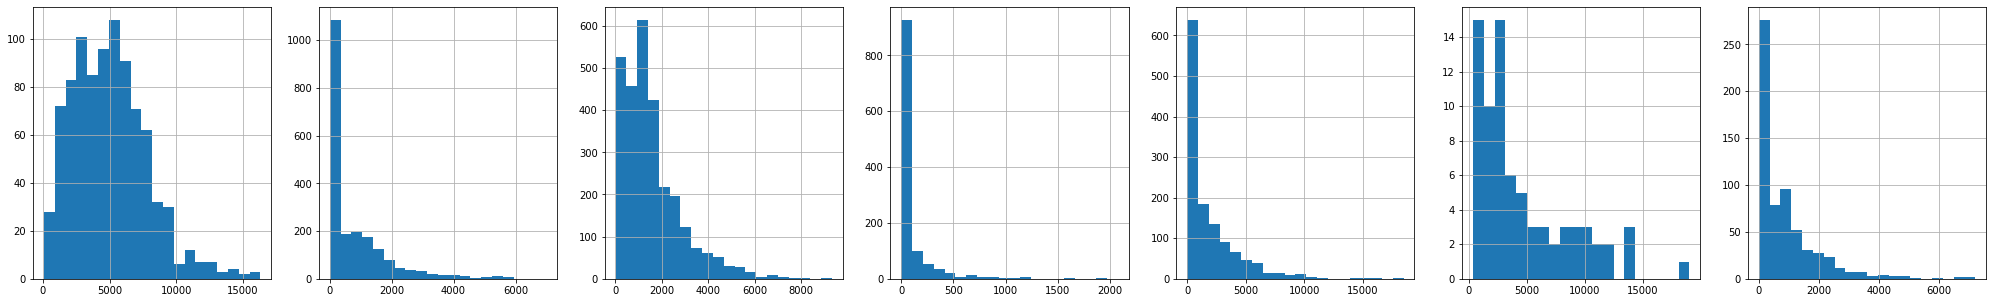

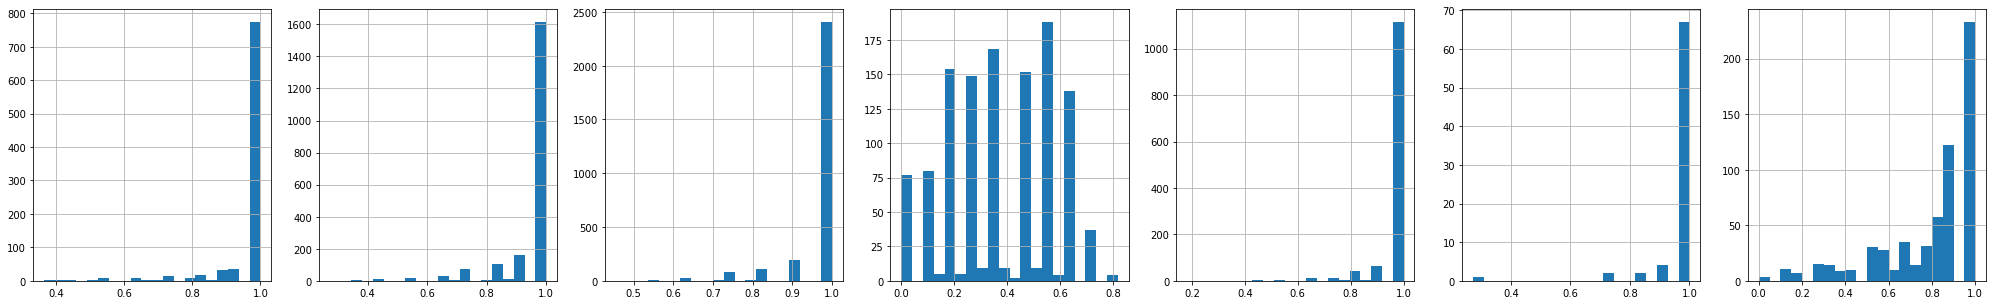

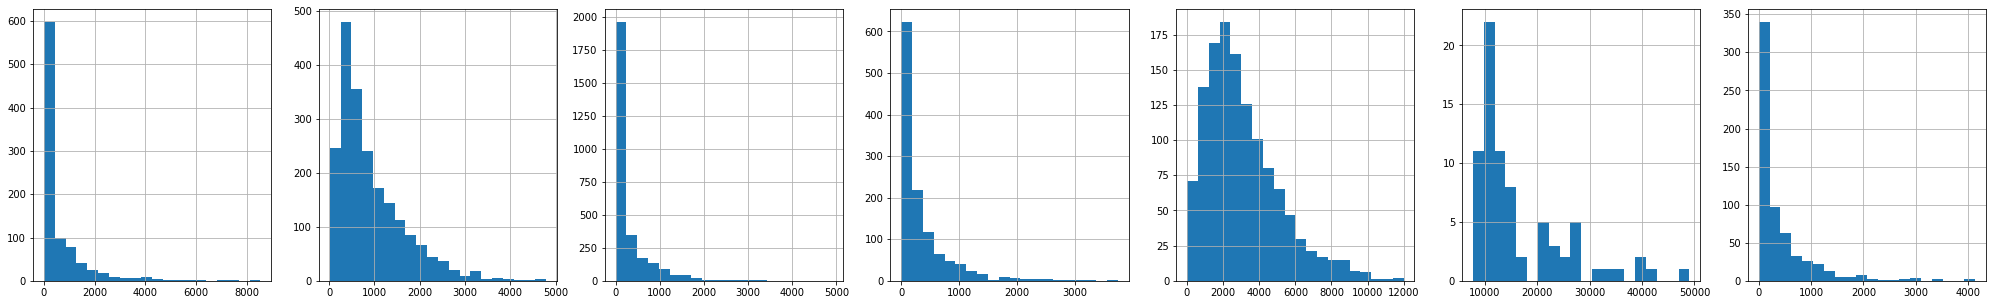

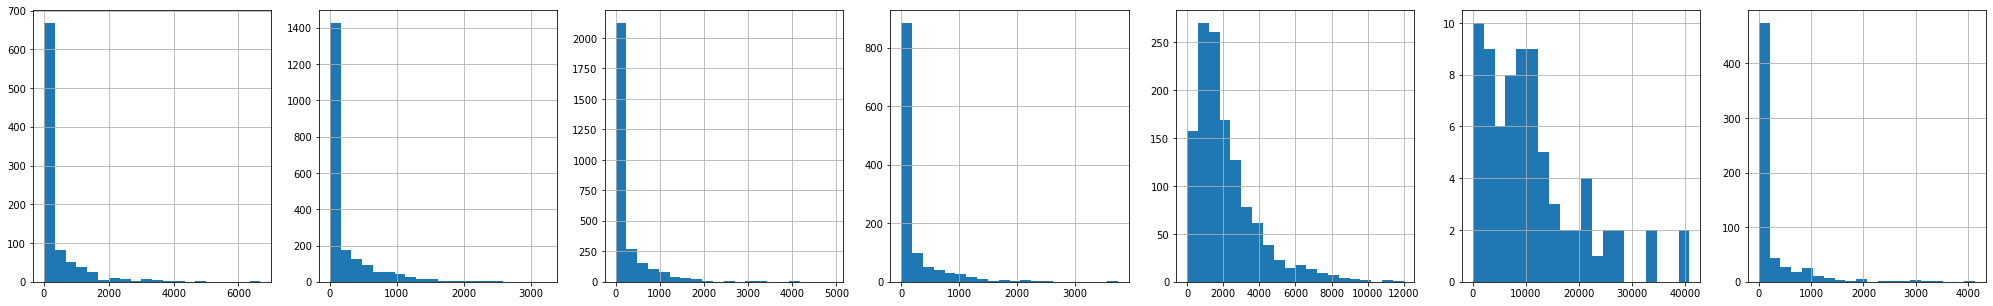

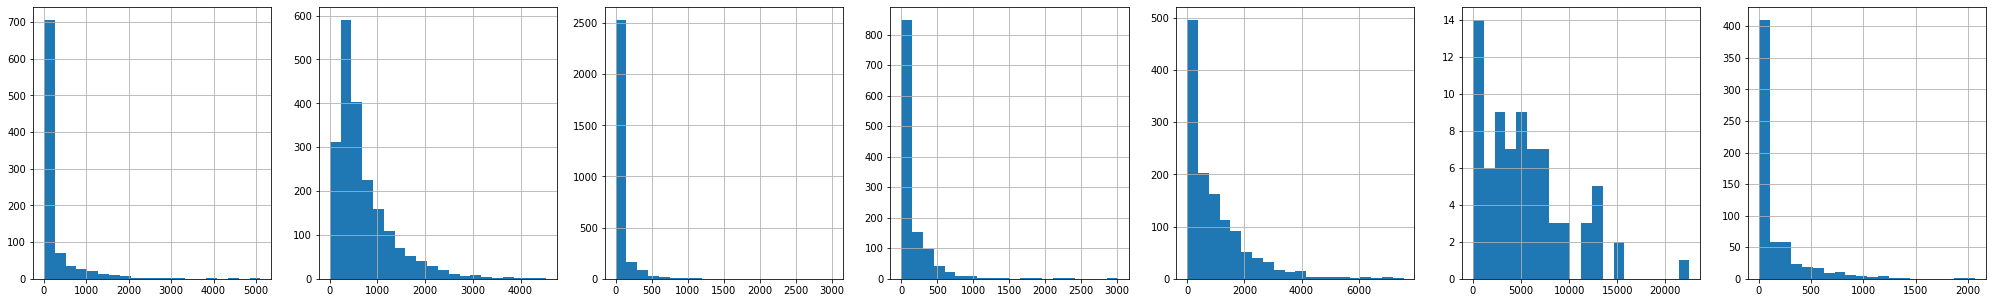

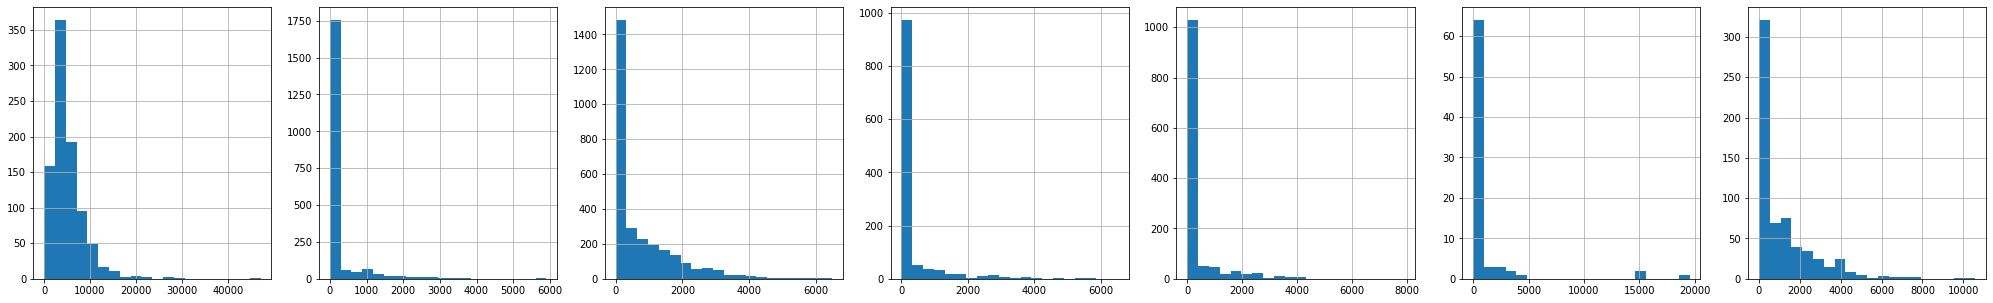

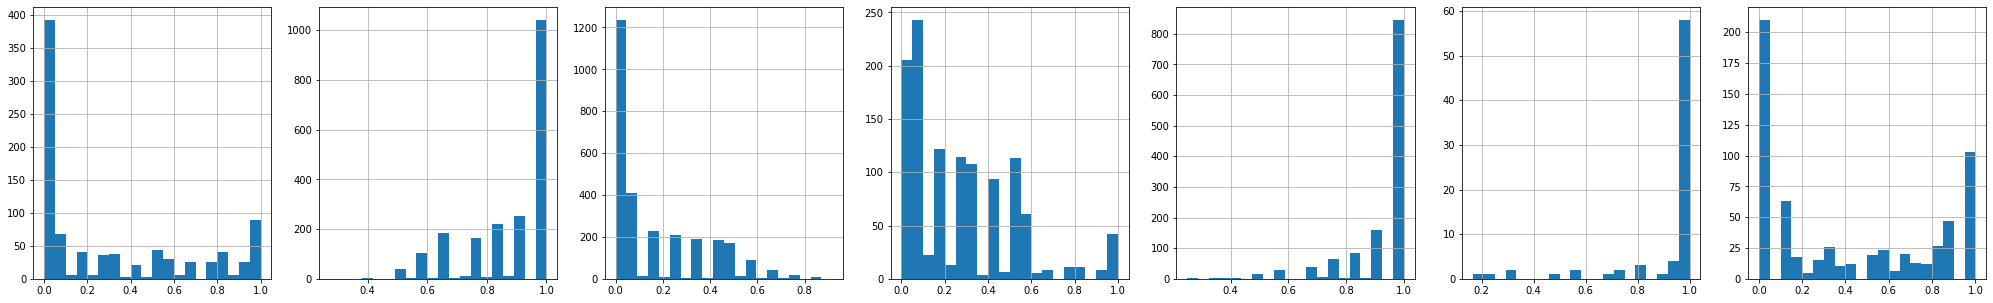

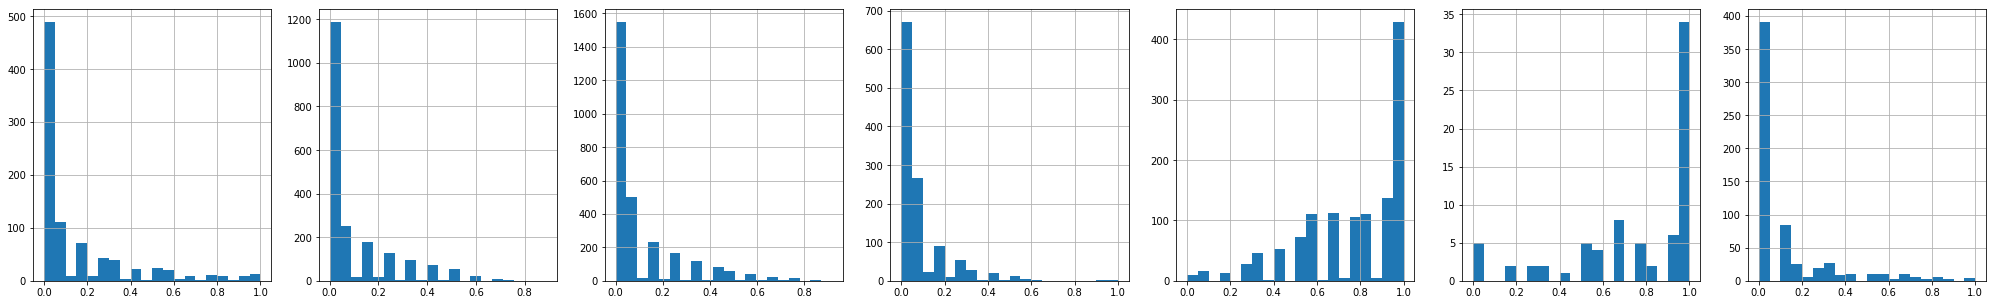

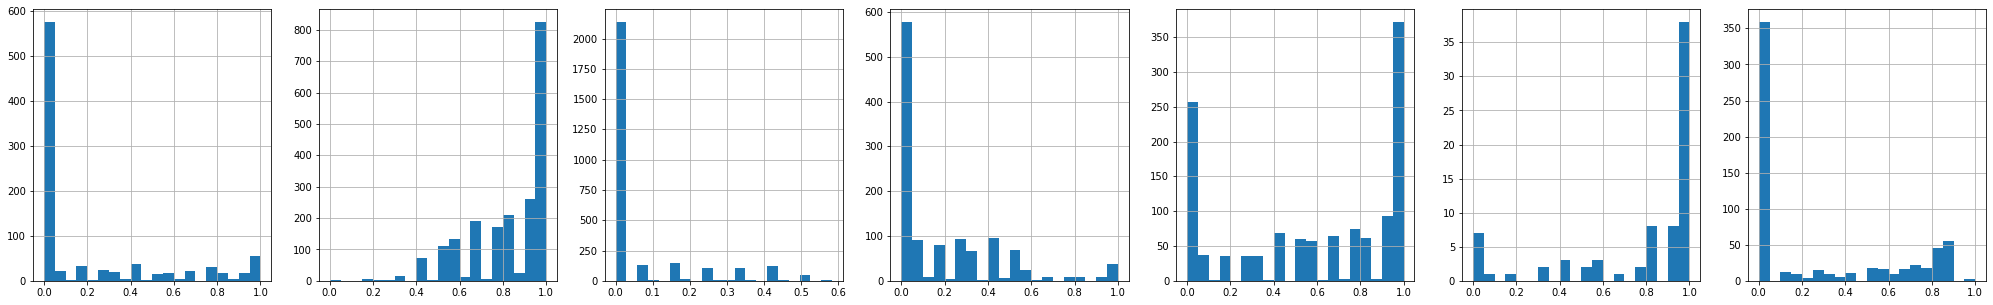

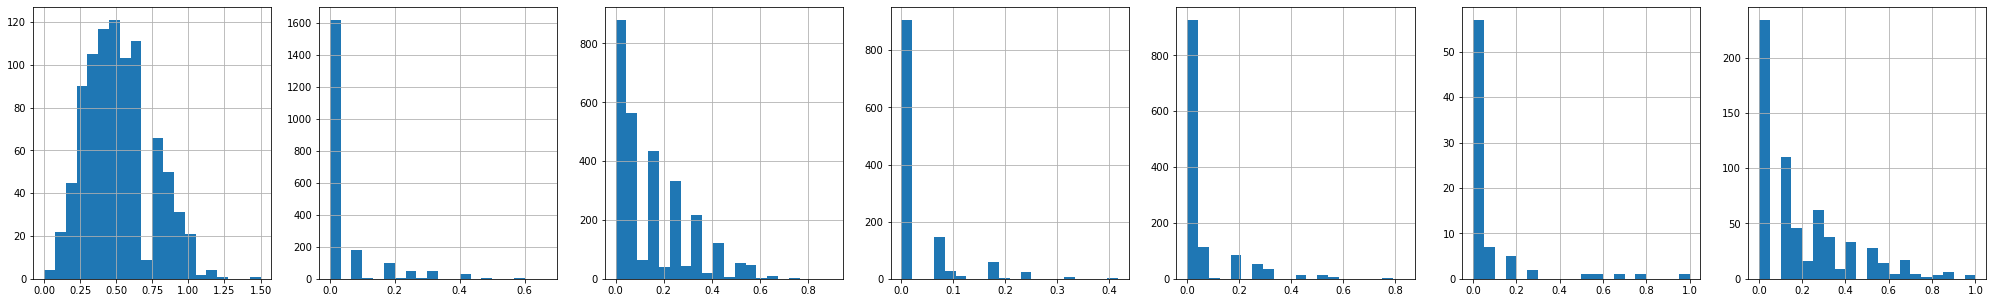

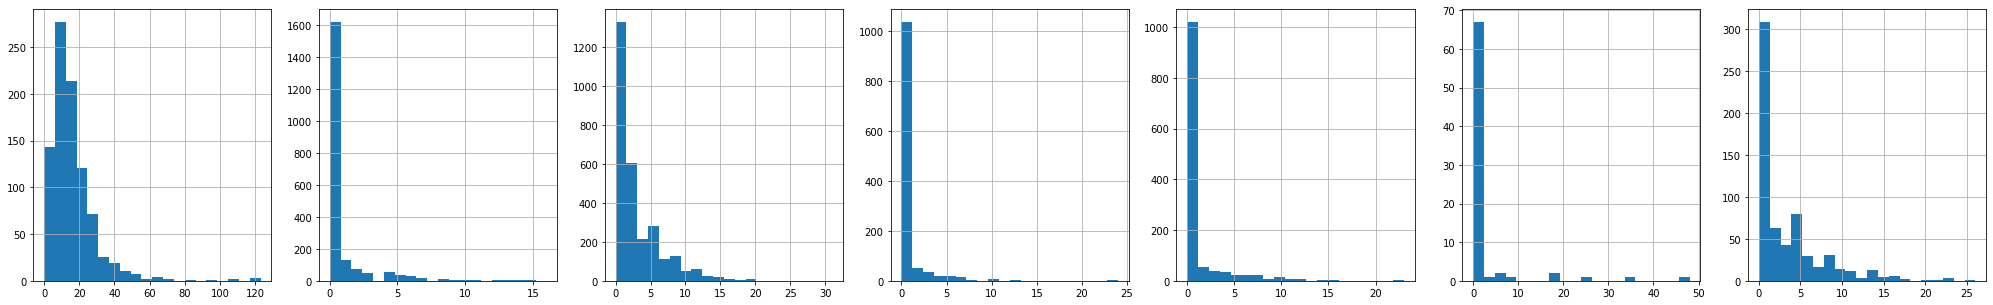

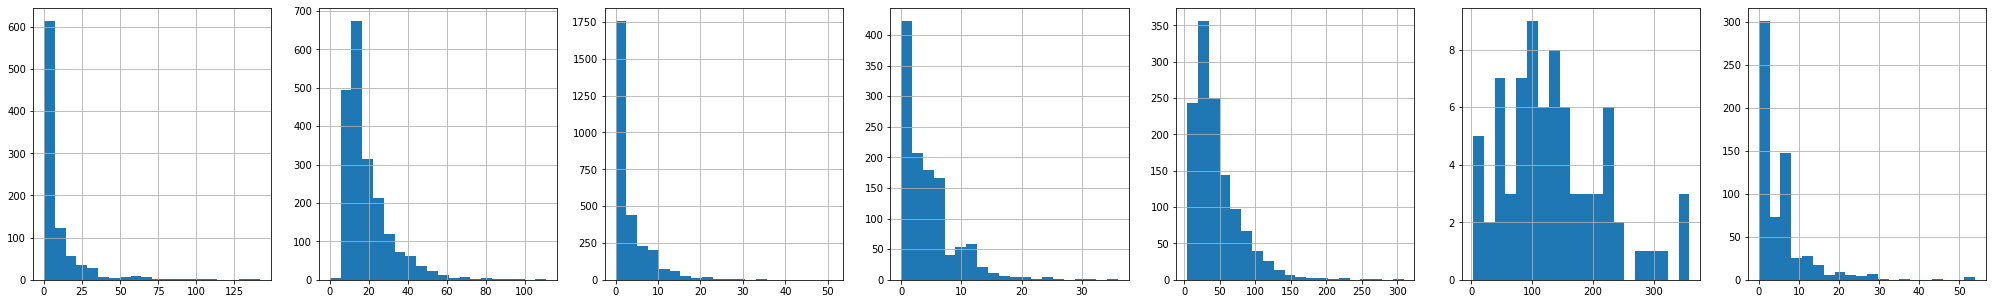

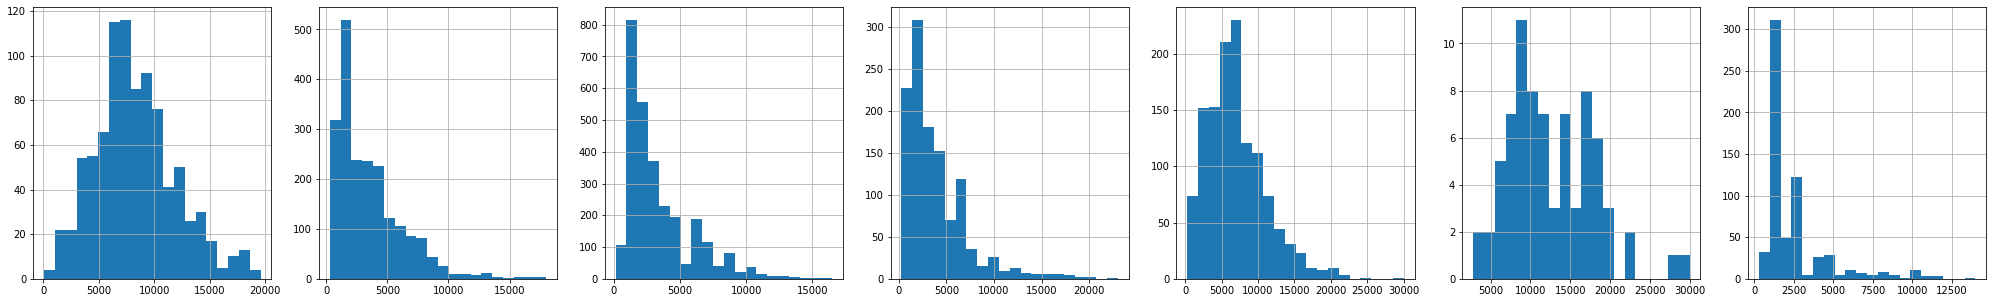

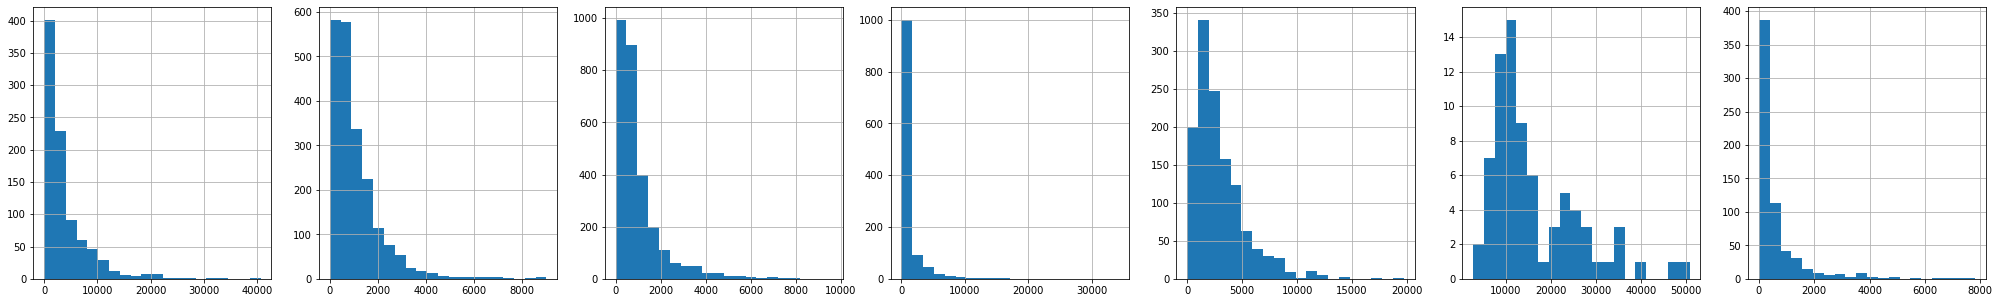

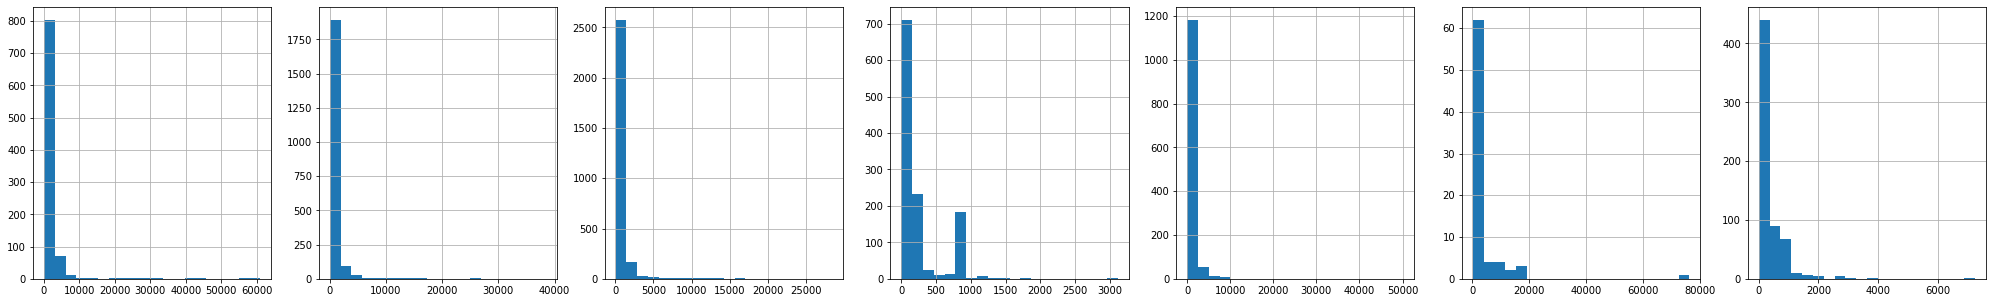

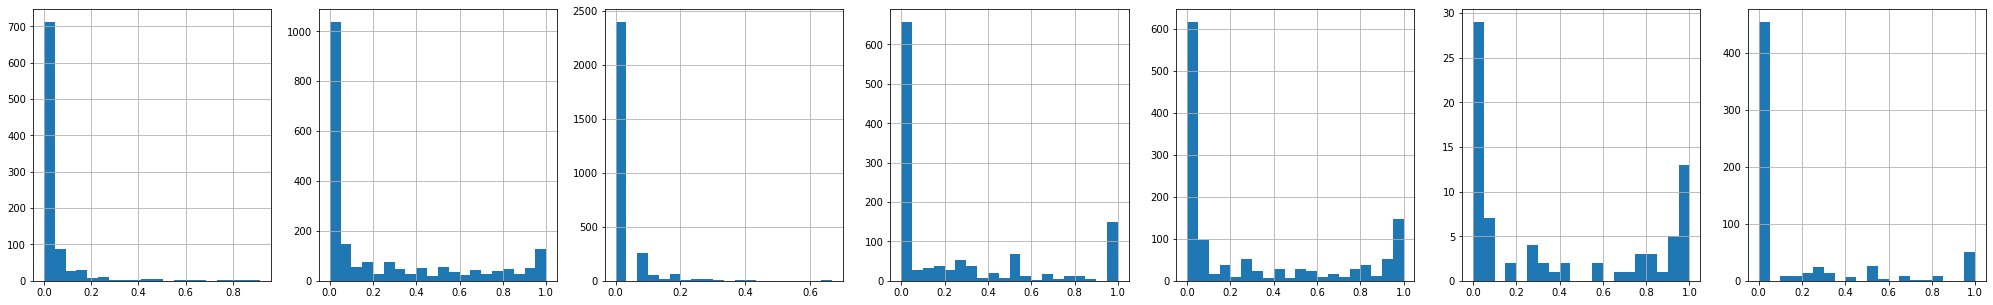

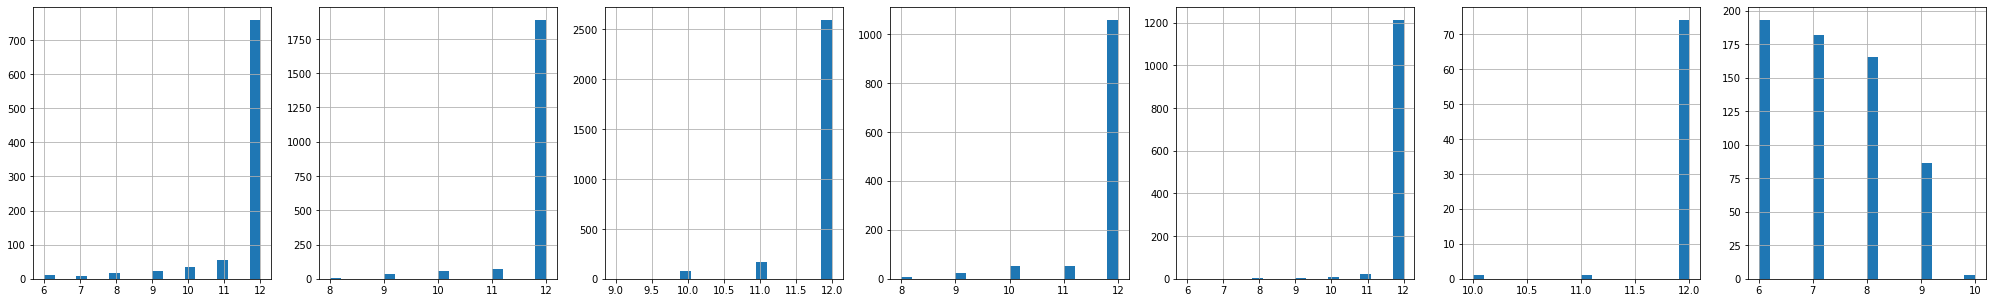

In [ ]:
# here we are going to plot bar chart for various clusters in all the columns thats (17 columns * (0-7)clusters)
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster=final_data[final_data['cluster']==j]
    cluster[i].hist(bins=20)
  plt.show()



In [ ]:
# principal component analysis  ( this is used to reduce the dimentionality)

In [ ]:
# dimentionality reduction

In [ ]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(my_data)


array([[-1.68221652, -1.07647554],
       [-1.13827153,  2.50632812],
       [ 0.96967136, -0.3834384 ],
       ...,
       [-0.92620464, -1.81077767],
       [-2.33654893, -0.65798019],
       [-0.55642744, -0.4004285 ]])

In [ ]:
pca_dataframe=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_dataframe                                                            # creatiing dataframe for the pca data

,pca1,pca2
0,-1.682217,-1.076476
1,-1.138272,2.506328
2,0.969671,-0.383438
3,-0.873634,0.043188
4,-1.599428,-0.688614
...,...,...
8945,-0.359629,-2.016145
8946,-0.564380,-1.639064
8947,-0.926205,-1.810778
8948,-2.336549,-0.657980


In [ ]:
pca_df=pd.concat([pca_dataframe,pd.DataFrame({'cluster':label})],axis=1) # concatinaing ( this step we have done earlier for 7 groups)
pca_df

,pca1,pca2,cluster
0,-1.682217,-1.076476,2
1,-1.138272,2.506328,0
2,0.969671,-0.383438,4
3,-0.873634,0.043188,2
4,-1.599428,-0.688614,2
...,...,...,...
8945,-0.359629,-2.016145,6
8946,-0.564380,-1.639064,6
8947,-0.926205,-1.810778,6
8948,-2.336549,-0.657980,6


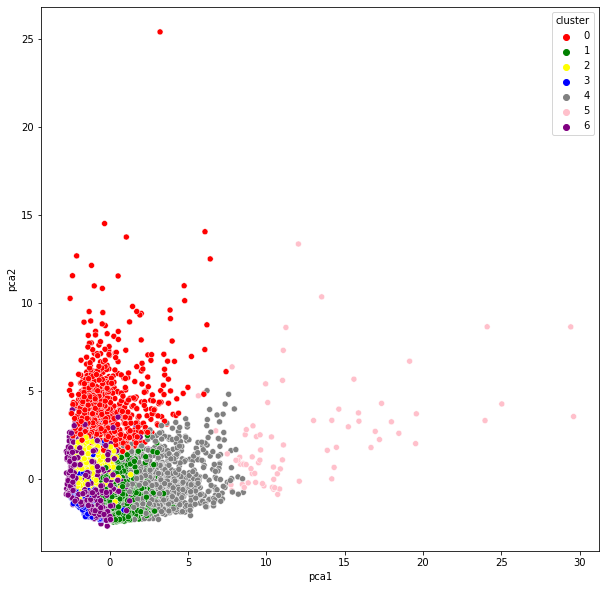

In [ ]:
#ploting the scatterplot for the pca_df data(7 different clusters)
plt.figure(figsize=(10,10))
pca_df_plot=sns.scatterplot(x='pca1',y='pca2',hue="cluster",data=pca_df,palette=['red','green','yellow','blue','gray','pink','purple'])
plt.show()